#Consonants

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
data_path = Path('spectrograms_of_myanmar_pictures')
consonant_path = data_path/'consonant'

use 10% of training data as validation data

In [0]:
data = ImageDataBunch.from_folder(consonant_path, test='test', valid_pct=0.1, seed=42, bs=32)
data

ImageDataBunch;

Train: LabelList (3955 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
16,16,16,16,16
Path: spectrograms_of_myanmar_pictures/consonant;

Valid: LabelList (439 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
9,19,17,7,22
Path: spectrograms_of_myanmar_pictures/consonant;

Test: LabelList (440 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: EmptyLabelList
,,,,
Path: spectrograms_of_myanmar_pictures/consonant

use ResNet34 as pretrained model

In [0]:
learner = cnn_learner(data, base_arch=models.resnet34, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 192MB/s]


In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


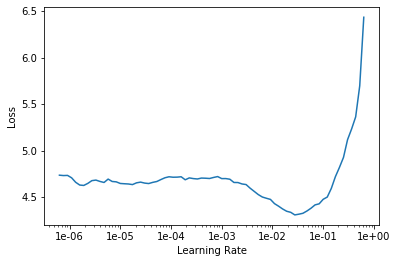

In [0]:
learner.recorder.plot()

In [0]:
learner.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.319250,2.511440,0.287016,02:31
1,2.234837,2.056407,0.423690,02:28
2,1.729257,2.132949,0.453303,02:27
3,1.284764,1.950084,0.457859,02:27
4,0.985064,1.016945,0.694761,02:27
5,0.719030,0.640713,0.772210,02:27
6,0.472535,0.388757,0.886105,02:27
7,0.315169,0.344116,0.886105,02:27
8,0.186656,0.262046,0.920273,02:27
9,0.128045,0.250703,0.922551,02:27


validation accuracy is about 92% and save the model

In [0]:
learner.save('stage-1')

In [0]:
learner.load('myanmar_speech_consonants')

Learner(data=ImageDataBunch;

Train: LabelList (3955 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
16,16,16,16,16
Path: spectrograms_of_myanmar_pictures/consonant;

Valid: LabelList (439 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
9,19,17,7,22
Path: spectrograms_of_myanmar_pictures/consonant;

Test: LabelList (440 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: EmptyLabelList
,,,,
Path: spectrograms_of_myanmar_pictures/consonant, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ce

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

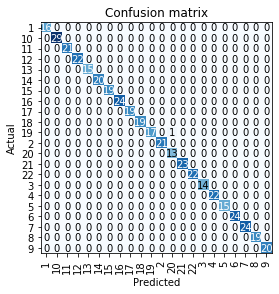

In [0]:
interp.plot_confusion_matrix()

using test set to get test accuracy

In [0]:
test_path = consonant_path/'test'

In [0]:
correct_count = 0
total = 0

In [0]:
classes = test_path.ls()

In [0]:
for _class in classes:
  correct_class = str(_class).split('/')[-1]
  images = [open_image(file_path) for file_path in _class.ls()]
  predictions = [learner.predict(img)[0].obj for img in images]
  total += len(predictions)
  correct_count += len(list(filter(lambda x: x == correct_class, predictions)))

In [29]:
total, correct_count

(440, 412)

In [30]:
print(f'open test accuracy : {(correct_count / total) * 100}%')

open test accuracy : 93.63636363636364%
